## Verify Data Integrity

In [12]:
import pandas as pd
import os

# Load the CSV files into DataFrames
# os.chdir('..')
print(os.getcwd())  
df = pd.read_csv('Data/bills.csv')
venues_df = pd.read_csv('Data/venues.csv')

# Merge the DataFrames on the 'venue_xref_id' column
df = df.merge(venues_df, on='venue_xref_id', how='left')

# Display the first few rows of the DataFrame
df.head(20)

c:\Users\seans\Documents\GitHub\TouchBistroEDA\Pipeline


,bill_paid_at_local,bill_total_billed,bill_total_discount_item_level,bill_total_gratuity,bill_total_net,bill_total_tax,bill_total_voided,bill_uuid,business_date,order_duration_seconds,...,payment_amount,payment_count,payment_total_tip,sales_revenue_with_tax,venue_xref_id,waiter_uuid,concept,city,country,start_of_day_offset
0,2024-07-01 09:17:01,21.81,0.0,0.0,19.30,2.51,0.0,240701091701~4D63608F-523C-4EFF-9A4F-78D6C44B5159,2024-07-01,46,...,21.81,1,0.0,21.81,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,NaN,Collingwood,CA,00:00:00
1,2024-07-01 13:37:00,48.95,0.0,0.0,43.32,5.63,0.0,240701133659~3A0BEDE2-E9E5-484D-B909-780E485F0D69,2024-07-01,288,...,48.95,1,0.0,48.95,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,NaN,Collingwood,CA,00:00:00
2,2024-07-01 11:19:32,26.94,0.0,0.0,23.84,3.10,0.0,240701111931~670EEB85-E939-4924-B92F-C95076B7E930,2024-07-01,135,...,26.94,1,0.0,26.94,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,NaN,Collingwood,CA,00:00:00
3,2024-07-01 15:05:59,3.96,0.0,0.0,3.77,0.19,0.0,240701150558~3D6F473E-D5EF-4BB8-AFAB-30DB2A0764C0,2024-07-01,48,...,3.96,1,0.0,3.96,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,NaN,Collingwood,CA,00:00:00
4,2024-07-01 12:41:00,3.36,0.0,0.0,3.20,0.16,0.0,240701124059~0521794C-51FC-4C30-A368-995CE4DE105F,2024-07-01,103,...,3.36,1,0.0,3.36,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,NaN,Collingwood,CA,00:00:00
5,2024-07-01 10:01:55,16.36,0.0,0.0,14.48,1.88,0.0,240701100155~9B70DD97-2C09-4EF1-9C7B-8076D84E062B,2024-07-01,84,...,16.36,1,0.0,16.36,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,NaN,Collingwood,CA,00:00:00
6,2024-07-01 12:23:46,17.42,0.0,0.0,15.42,2.00,0.0,240701122346~091CE8CA-7135-43F7-8D67-A5261BD30CDA,2024-07-01,142,...,17.42,1,0.0,17.42,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,NaN,Collingwood,CA,00:00:00
7,2024-07-01 11:59:07,25.11,0.0,0.0,22.22,2.89,0.0,240701115907~074476EF-C6EA-49A0-B76E-E99264E1D1A6,2024-07-01,131,...,25.11,1,0.0,25.11,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,NaN,Collingwood,CA,00:00:00
8,2024-07-01 15:37:40,4.97,0.0,0.0,4.40,0.57,0.0,240701153740~40A8D7C4-425A-44DB-98FF-E663A12E19F6,2024-07-01,19,...,4.97,1,0.0,4.97,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,NaN,Collingwood,CA,00:00:00
9,2024-07-01 16:20:10,19.00,0.0,0.0,19.00,0.00,0.0,240701162010~01A577B5-25CB-4908-AF54-73B5428FD83B,2024-07-01,716,...,25.00,1,6.0,19.00,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,NaN,Collingwood,CA,00:00:00


## Check for Outliers for Innacurate Order Duration

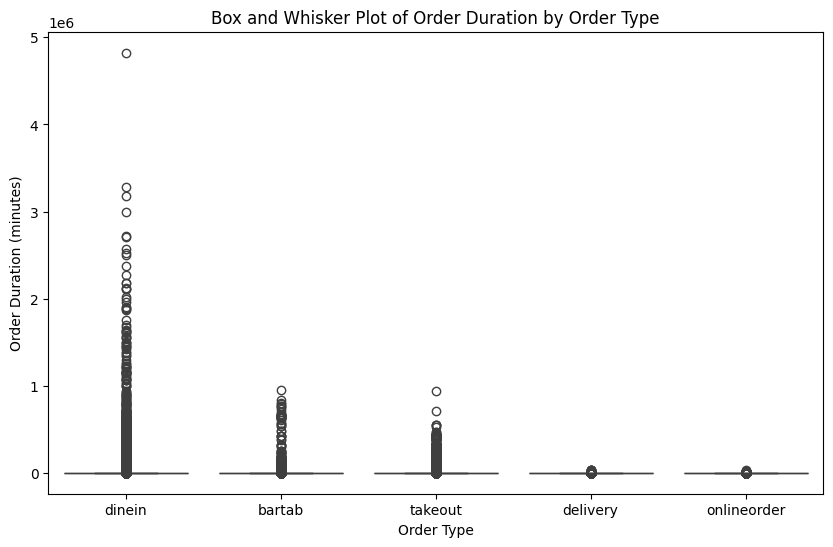

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert order duration from seconds to minutes
df['order_duration_minutes'] = df['order_duration_seconds'] / 60

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_take_out_type_label', y='order_duration_minutes', data=df)
plt.title('Box and Whisker Plot of Order Duration by Order Type')
plt.xlabel('Order Type')
plt.ylabel('Order Duration (minutes)')
plt.show()


## Check where the Outliers Begin

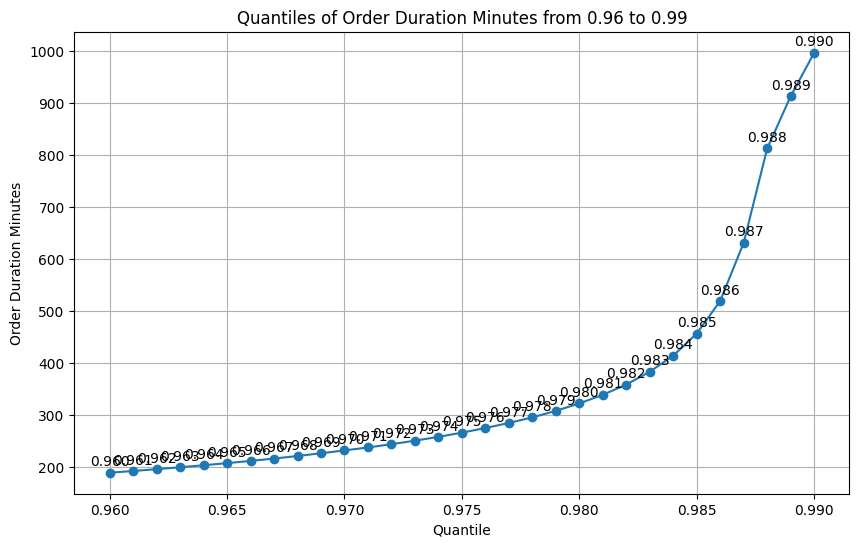

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate quantiles from 0.96 to 0.999 in 0.001 increments
quantiles = np.arange(0.96, 0.99, 0.001)
quantile_values = [df['order_duration_minutes'].quantile(q) for q in quantiles]

# Plot the quantiles
plt.figure(figsize=(10, 6))
plt.plot(quantiles, quantile_values, marker='o')

# Annotate each point with the quantile number
for i, q in enumerate(quantiles):
    plt.annotate(f'{q:.3f}', (q, quantile_values[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Quantiles of Order Duration Minutes from 0.96 to 0.99')
plt.xlabel('Quantile')
plt.ylabel('Order Duration Minutes')
plt.grid(True)
plt.show()

### Data is Valid Until 0.994

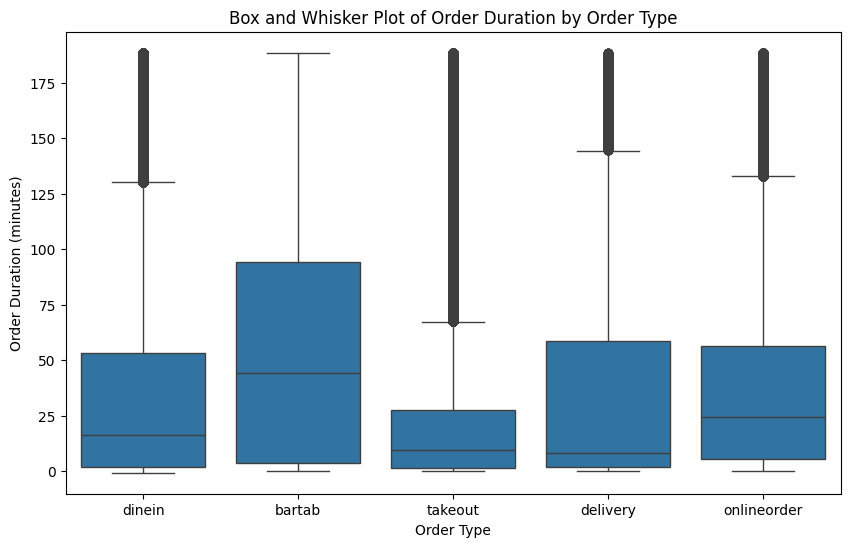

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where order_duration_minutes is greater than 180
filtered_df = df[df['order_duration_minutes'] <= df['order_duration_minutes'].quantile(0.96)]

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_take_out_type_label', y='order_duration_minutes', data=filtered_df)
plt.title('Box and Whisker Plot of Order Duration by Order Type')
plt.xlabel('Order Type')
plt.ylabel('Order Duration (minutes)')
plt.show()


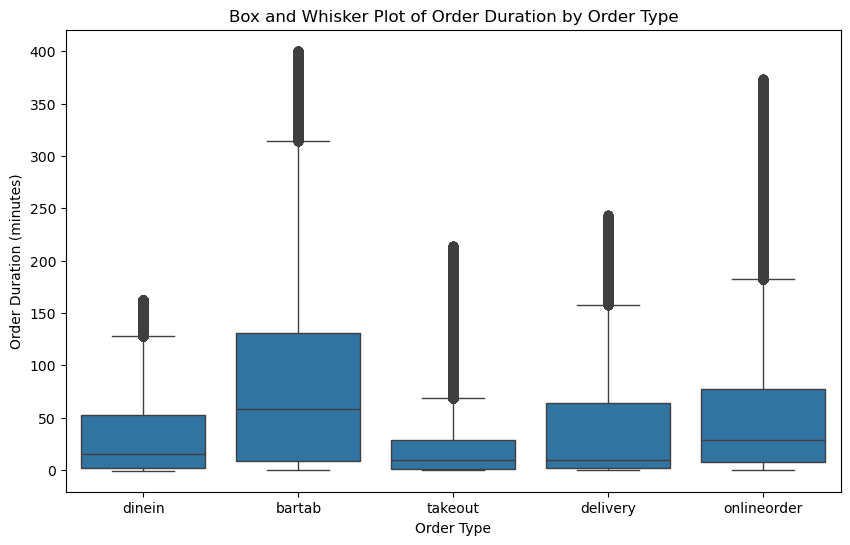

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the 0.96 quantile for each order type
quantile_96_per_type = df.groupby('order_take_out_type_label')['order_duration_minutes'].quantile(0.96)

# Filter the DataFrame based on the 0.96 quantile for each order type using .map()
filtered_df = df[df['order_duration_minutes'] <= df['order_take_out_type_label'].map(quantile_96_per_type)]

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_take_out_type_label', y='order_duration_minutes', data=filtered_df)
plt.title('Box and Whisker Plot of Order Duration by Order Type')
plt.xlabel('Order Type')
plt.ylabel('Order Duration (minutes)')
plt.show()


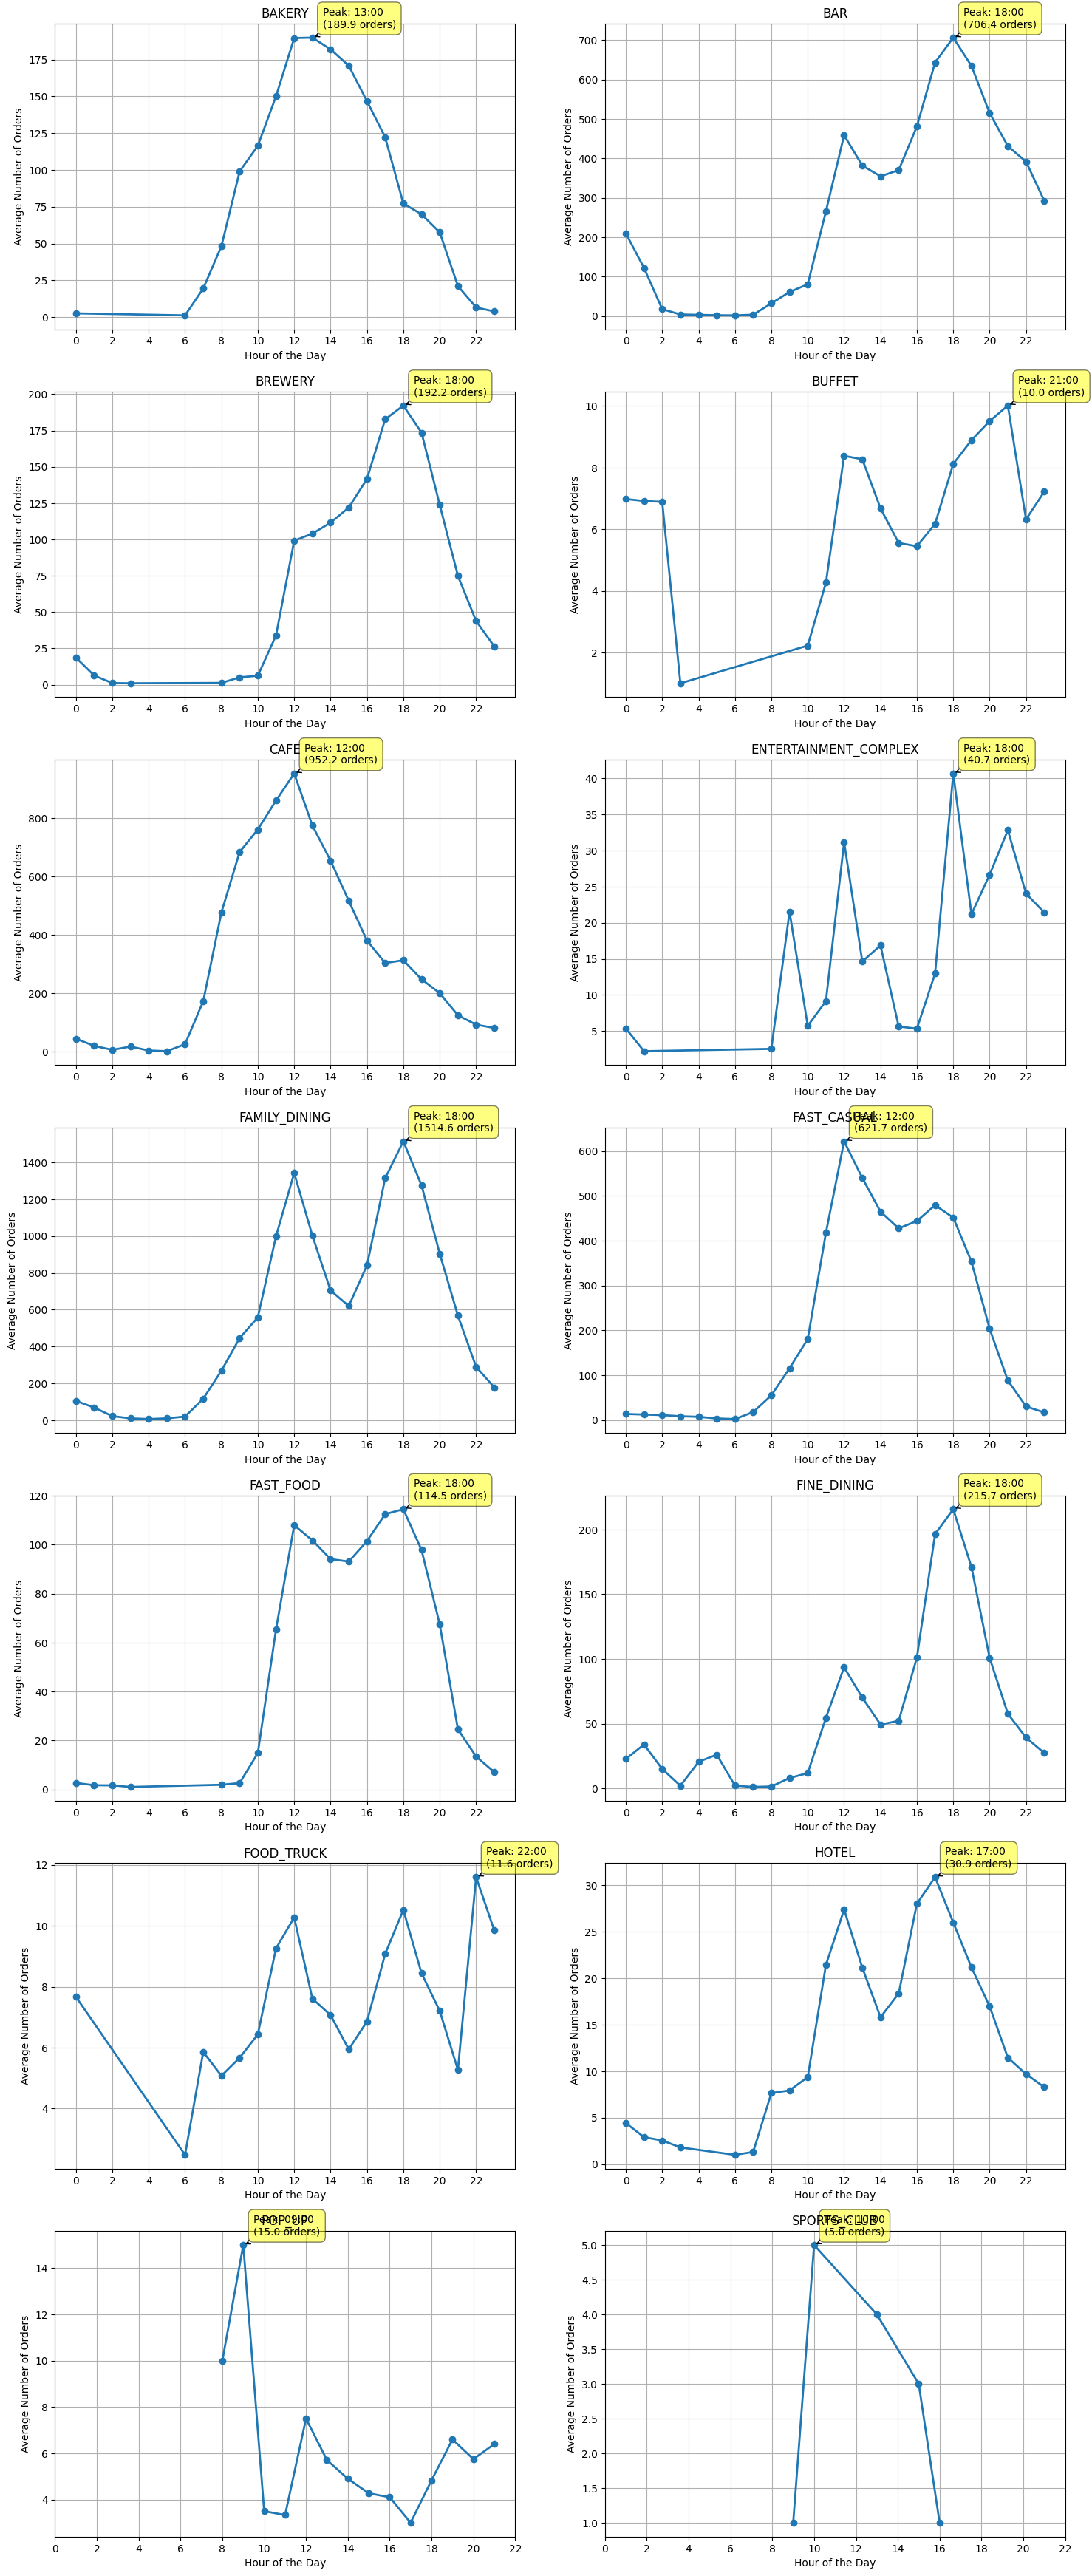


Summary Statistics by Concept:

BAKERY:
Peak hour: 13:00
Average orders at peak: 189.87
Daily average orders: 88.13

BAR:
Peak hour: 18:00
Average orders at peak: 706.39
Daily average orders: 269.15

BREWERY:
Peak hour: 18:00
Average orders at peak: 192.18
Daily average orders: 73.47

BUFFET:
Peak hour: 21:00
Average orders at peak: 10.02
Daily average orders: 6.60

CAFE:
Peak hour: 12:00
Average orders at peak: 952.19
Daily average orders: 321.46

ENTERTAINMENT_COMPLEX:
Peak hour: 18:00
Average orders at peak: 40.69
Daily average orders: 16.66

FAMILY_DINING:
Peak hour: 18:00
Average orders at peak: 1514.65
Daily average orders: 549.69

FAST_CASUAL:
Peak hour: 12:00
Average orders at peak: 621.71
Daily average orders: 206.95

FAST_FOOD:
Peak hour: 18:00
Average orders at peak: 114.54
Daily average orders: 51.39

FINE_DINING:
Peak hour: 18:00
Average orders at peak: 215.68
Daily average orders: 57.21

FOOD_TRUCK:
Peak hour: 22:00
Average orders at peak: 11.60
Daily average orders: 7.4

In [23]:
# Create a time series DataFrame from the existing filtered_df
time_series_df = filtered_df[['order_seated_at_local', 'order_uuid', 'venue_xref_id', 'business_date', 'concept']].copy()
time_series_df.set_index('order_seated_at_local', inplace=True)
time_series_df.index = pd.to_datetime(time_series_df.index)
time_series_df['order_count'] = 1

# Extract the hour from the datetime index
time_series_df['hour'] = time_series_df.index.hour

# Group by concept, business date, and hour, then sum the order counts
hourly_order_counts = time_series_df.groupby(['concept', 'business_date', 'hour'])['order_count'].sum().reset_index()

# Calculate the average order count per hour for each concept
average_hourly_order_counts = hourly_order_counts.groupby(['concept', 'hour'])['order_count'].mean().reset_index()

# Get unique concepts and calculate number of rows/columns for subplots
concepts = sorted(average_hourly_order_counts['concept'].unique())
n_concepts = len(concepts)
n_rows = (n_concepts + 1) // 2  # Calculate number of rows needed (2 plots per row)
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()  # Flatten axes array for easier indexing

# Create a plot for each concept
for idx, concept in enumerate(concepts):
    concept_data = average_hourly_order_counts[average_hourly_order_counts['concept'] == concept]
    
    # Plot data
    axes[idx].plot(concept_data['hour'], concept_data['order_count'], marker='o', linewidth=2)
    
    # Customize each subplot
    axes[idx].set_title(f'{concept}')
    axes[idx].set_xlabel('Hour of the Day')
    axes[idx].set_ylabel('Average Number of Orders')
    axes[idx].grid(True)
    axes[idx].set_xticks(range(0, 24, 2))  # Show every 2 hours
    
    # Add peak hour annotation
    peak_hour = concept_data.loc[concept_data['order_count'].idxmax()]
    axes[idx].annotate(f'Peak: {peak_hour["hour"]:02d}:00\n({peak_hour["order_count"]:.1f} orders)',
                      xy=(peak_hour['hour'], peak_hour['order_count']),
                      xytext=(10, 10), textcoords='offset points',
                      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                      arrowprops=dict(arrowstyle='->'))

# Remove any empty subplots
for idx in range(n_concepts, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics by Concept:")
for concept in concepts:
    concept_data = average_hourly_order_counts[average_hourly_order_counts['concept'] == concept]
    print(f"\n{concept}:")
    print(f"Peak hour: {concept_data.loc[concept_data['order_count'].idxmax(), 'hour']:02d}:00")
    print(f"Average orders at peak: {concept_data['order_count'].max():.2f}")
    print(f"Daily average orders: {concept_data['order_count'].mean():.2f}")